In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "whitegrid")

In [2]:
df = pd.read_csv("/kaggle/input/google-play-store-apps/googleplaystore.csv")
df.head(1)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up


In [3]:
df.info() #checking for null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


**Step-A** **Finding missing value & duplicates**

In [4]:
df.isna().sum()     #find the column which has null values
#duplicated by app name (sometimes same app appears multiple times )
df.duplicated(subset=['App']).sum() 
df[df.duplicated(subset=['App'],keep = False)].sort_values('App').head(10)
#Dropig the duplicated rows keeping the first one only 
df = df.drop_duplicates(subset = ['App'],keep = 'first')

**Step-B** **Converting columns to numeric and fixing the string**

In [5]:
# Rating and Reviews numeric
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Price (remove $)
df['Price'] = df['Price'].astype(str).str.replace(r'[$]', '', regex=True)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce').fillna(0.0)

# Installs: remove commas and '+' then convert to int
df['Installs'] = df['Installs'].astype(str).str.replace(r'[+,]', '', regex=True)
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce').fillna(0).astype(int)

# Size: convert to MB numeric (handles 'Varies with device')
def size_to_mb(x):
    if pd.isna(x) or x in ['Varies with device', 'NaN', '']:
        return np.nan
    x = str(x).strip()
    if x.endswith('M'):
        try: return float(x[:-1])
        except: return np.nan
    if x.endswith('k') or x.endswith('K'):
        try: return float(x[:-1]) / 1024
        except: return np.nan
    # sometimes it's "1,000+"
    return np.nan

df['Size_MB'] = df['Size'].apply(size_to_mb)


**Step-C Datetime**

In [6]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'],errors = 'coerce')

**Step-D Standadize text**

In [7]:
df['Category']=df['Category'].str.strip().str.upper()
df['Genres']= df['Genres'].str.strip()
df['type']= df['Type'].fillna('Free')

**Step-E Report final cleaned shape and missingness**

In [8]:
df.info()
df.isna().mean().sort_values(ascending=False)  # fraction missing

<class 'pandas.core.frame.DataFrame'>
Index: 9660 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9660 non-null   object        
 1   Category        9660 non-null   object        
 2   Rating          8197 non-null   float64       
 3   Reviews         9659 non-null   float64       
 4   Size            9660 non-null   object        
 5   Installs        9660 non-null   int64         
 6   Type            9659 non-null   object        
 7   Price           9660 non-null   float64       
 8   Content Rating  9659 non-null   object        
 9   Genres          9660 non-null   object        
 10  Last Updated    9659 non-null   datetime64[ns]
 11  Current Ver     9652 non-null   object        
 12  Android Ver     9657 non-null   object        
 13  Size_MB         8432 non-null   float64       
 14  type            9660 non-null   object        
dtypes: datet

Rating            0.151449
Size_MB           0.127122
Current Ver       0.000828
Android Ver       0.000311
Reviews           0.000104
Type              0.000104
Content Rating    0.000104
Last Updated      0.000104
App               0.000000
Category          0.000000
Size              0.000000
Installs          0.000000
Price             0.000000
Genres            0.000000
type              0.000000
dtype: float64

# **Basic_level_Question**

**Q1-What is the average rating**

In [9]:
avg_rating=df['Rating'].mean()
avg_rating

4.17505184823716

**Q2-How many unique categories**

In [10]:
num_categories = df['Category'].nunique()
num_categories

34

**Q3-Distribuation of app size**

<function matplotlib.pyplot.show(close=None, block=None)>

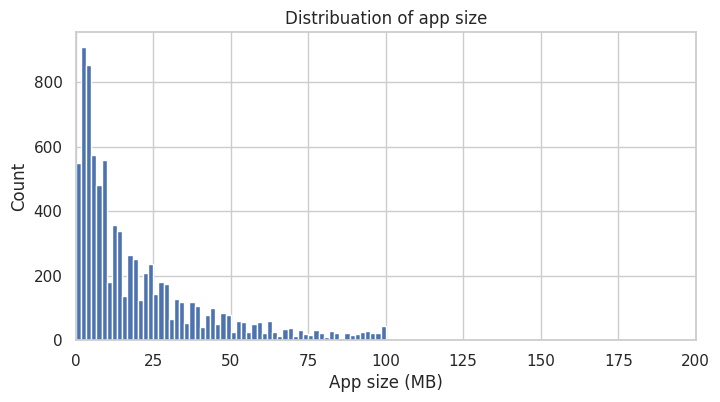

In [11]:
plt.figure(figsize = (8,4))
plt.hist(df["Size_MB"].dropna(),bins=60)
plt.xlabel('App size (MB)')
plt.ylabel('Count')
plt.title('Distribuation of app size')
plt.xlim(0,200)         #Zoom to see common sizes
plt.show

**Q3-Free Vs Paid Count**

In [12]:
df['Type'].value_counts()

Type
Free    8902
Paid     756
0          1
Name: count, dtype: int64

**Q5. Most common content rating**

In [13]:
df['Content Rating'].mode()[0]
df['Content Rating'].value_counts()

Content Rating
Everyone           7903
Teen               1036
Mature 17+          393
Everyone 10+        322
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

**Q6. Top 5 most installed apps**

In [14]:
df.sort_values('Installs',ascending = False).head(5)[['App','Installs','Category','Rating','Reviews']]

,App,Installs,Category,Rating,Reviews
336,WhatsApp Messenger,1000000000,COMMUNICATION,4.4,69119316.0
152,Google Play Books,1000000000,BOOKS_AND_REFERENCE,3.9,1433233.0
1654,Subway Surfers,1000000000,GAME,4.5,27722264.0
3117,Maps - Navigate & Explore,1000000000,TRAVEL_AND_LOCAL,4.3,9235155.0
340,Gmail,1000000000,COMMUNICATION,4.3,4604324.0


**Q7. How many apps have rating >= 4.0?**

In [15]:
(df['Rating']>=4.0).sum()

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)


6287

**Q8. Avg #reviews for free vs paid apps**

In [16]:
df.groupby('Type')['Reviews'].mean().reset_index()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Type,Reviews
0,0,NaN
1,Free,234270.002134
2,Paid,8724.887566


**Q9. Avg app size per category**

In [17]:
df.groupby("Category")['Size_MB'].mean().sort_values(ascending=False).reset_index().head()

,Category,Size_MB
0,GAME,41.866570
1,FAMILY,27.187747
2,TRAVEL_AND_LOCAL,24.204375
3,SPORTS,24.058153
4,ENTERTAINMENT,23.043750


**Q10. How many apps were last updated in 2018?**

In [18]:
(df[df['Last Updated'].dt.year == 2018]).shape[0]



6284

# **Medium_level_question**

**Q1. Correlation between installs and rating**

In [19]:
df[['Installs','Rating']].corr(method='pearson')
# better: Spearman if non-linear
df[['Installs','Rating']].corr(method='spearman')


,Installs,Rating
Installs,1.000000,0.026917
Rating,0.026917,1.000000


**Q2. Categories with highest avg rating**

In [20]:
df.groupby('Category')['Rating'].agg(['mean','count']).sort_values('mean',ascending = False).head(15)

,mean,count
Category,,
1.9,19.000000,1
EVENTS,4.435556,45
EDUCATION,4.364407,118
ART_AND_DESIGN,4.357377,61
BOOKS_AND_REFERENCE,4.344970,169
PERSONALIZATION,4.332215,298
PARENTING,4.300000,50
BEAUTY,4.278571,42
GAME,4.247368,912


**Q3. Price effect on rating (paid apps)**

In [21]:
paid = df[df['Type']=="Paid"].copy()
paid.groupby('Price')['Rating'].agg(['mean','count']).sort_values('mean',ascending = False).head(15)

,mean,count
Price,,
1.75,5.00,1
3.04,5.00,1
2.50,4.80,1
15.99,4.70,1
19.40,4.70,1
3.90,4.70,1
2.59,4.70,1
10.00,4.65,2
79.99,4.60,1


**Q4. Distribution of ratings across Content Rating**

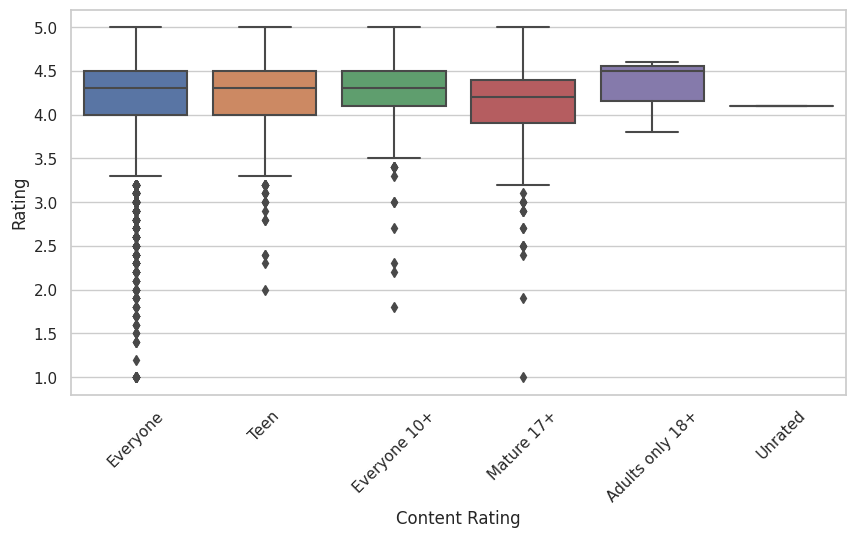

In [22]:
plt.figure(figsize = (10,5))
sns.boxplot(x="Content Rating",y="Rating",data=df)
plt.xticks(rotation = 45)
plt.show()

**Q5. Genres with most apps > 1M installs**

In [23]:
df[df['Installs']>1_000_000].groupby("Genres")['App'].count().sort_values(ascending = False).head(15)

Genres
Tools                      172
Action                     128
Photography                123
Communication               99
Productivity                91
Entertainment               83
Arcade                      81
Sports                      79
Shopping                    72
Social                      67
Personalization             66
Casual                      57
Health & Fitness            56
Travel & Local              55
Video Players & Editors     50
Name: App, dtype: int64

**Q6. How frequently do apps get updated?**

In [24]:
#If the dataset has multiple Last updated entries per App
df_hist = df.sort_values(['App',"Last Updated"])
df_hist['prev_update']=df_hist.groupby('App')['Last Updated'].shift(1)
df_hist['days_between']=(df_hist['Last Updated']-df_hist['prev_update']).dt.days
df_hist['days_between'].mean()

nan

**Q7. Impact of app size on installs**

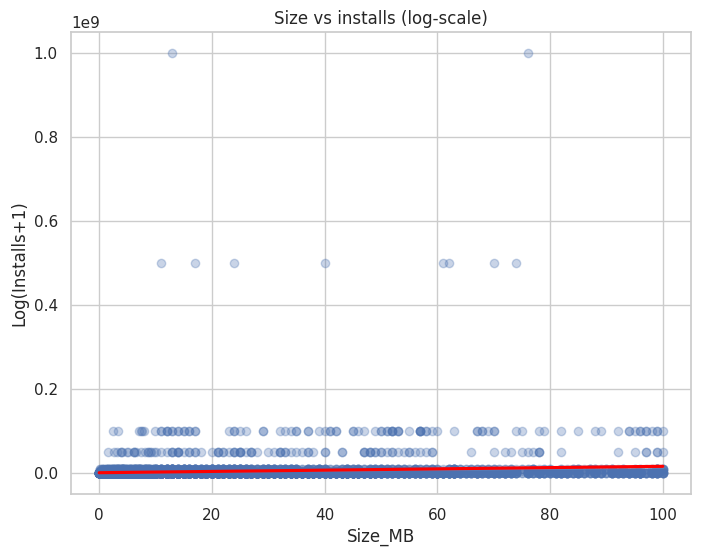

In [25]:
plt.figure(figsize=(8,6))
sub = df[df['Size_MB'].notnull()&(df['Installs']>0)]
sns.regplot(x="Size_MB",y='Installs',data = sub , scatter_kws={'alpha':0.3},line_kws={'color':'red'})
plt.xlabel('Size_MB')
plt.ylabel('Log(Installs+1)')
plt.title("Size vs installs (log-scale)")
plt.show()

**Q8. Apps with highest number of reviews and their ratings**

In [26]:
df.sort_values('Reviews',ascending=False).head(10)[['App','Reviews','Installs','Rating']]

,App,Reviews,Installs,Rating
2544,Facebook,78158306.0,1000000000,4.1
336,WhatsApp Messenger,69119316.0,1000000000,4.4
2545,Instagram,66577313.0,1000000000,4.5
335,Messenger – Text and Video Chat for Free,56642847.0,1000000000,4.0
1670,Clash of Clans,44891723.0,100000000,4.6
4005,Clean Master- Space Cleaner & Antivirus,42916526.0,500000000,4.7
1654,Subway Surfers,27722264.0,1000000000,4.5
3665,YouTube,25655305.0,1000000000,4.3
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",24900999.0,500000000,4.7
1660,Clash Royale,23133508.0,100000000,4.6


**Q9. Content rating distribution free vs paid**

In [27]:
pd.crosstab(df['Content Rating'],df['Type'],normalize='columns')

Type,Free,Paid
Content Rating,,
Adults only 18+,0.000337,0.000000
Everyone,0.814199,0.866402
Everyone 10+,0.032577,0.041005
Mature 17+,0.042125,0.023810
Teen,0.110537,0.068783
Unrated,0.000225,0.000000


**Q10. Top 5 categories with the most installs**

In [28]:
df.groupby('Category')['Installs'].sum().sort_values(ascending = False).head()

Category
GAME             13878924415
COMMUNICATION    11038276251
TOOLS             8001771915
PRODUCTIVITY      5793091369
SOCIAL            5487867902
Name: Installs, dtype: int64

# **Advance_level_question**

**Q1. Top 10 apps by rating with reviews/installs**

In [29]:
top_rated=df[df['Rating'].notnull()].sort_values(['Rating','Reviews'],ascending = [False,False]).reset_index().head(50)
top_rated[['App','Rating','Reviews','Installs']].head(10)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,App,Rating,Reviews,Installs
0,Life Made WI-Fi Touchscreen Photo Frame,19.0,NaN,0
1,Ríos de Fe,5.0,141.0,1000
2,"FD Calculator (EMI, SIP, RD & Loan Eligilibility)",5.0,104.0,1000
3,Oración CX,5.0,103.0,5000
4,Barisal University App-BU Face,5.0,100.0,1000
5,Master E.K,5.0,90.0,1000
6,CL REPL,5.0,47.0,1000
7,AJ Cam,5.0,44.0,100
8,AI Today : Artificial Intelligence News & AI 101,5.0,43.0,100
9,CS & IT Interview Questions,5.0,43.0,1000


**Q2. Trend of app updates over time (seasonality)**

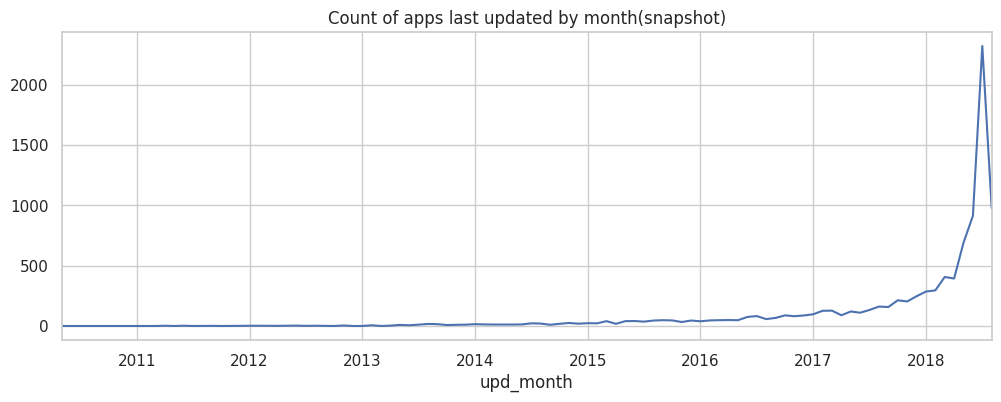

In [30]:
df['upd_month']=df['Last Updated'].dt.to_period('M')
monthly = df.groupby('upd_month')['App'].count()
monthly.plot(figsize =(12,4))
plt.title('Count of apps last updated by month(snapshot)')
plt.show()

**Q3. Binned analysis: rating change with number of installs**

In [31]:
# create bins on Installs (log scale)
df['inst_bin'] = pd.qcut(df['Installs'].rank(method='first'), q=6, labels=False)
df.groupby('inst_bin')['Rating'].mean().reset_index()
# or custom bins on raw installs
bins = [0, 1000, 10000, 100000, 1_000_000, 10_000_000, 1_000_000_000]
df['inst_bin2'] = pd.cut(df['Installs'], bins=bins)
df.groupby('inst_bin2')['Rating'].mean().reset_index()


/tmp/ipykernel_13/988792623.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('inst_bin2')['Rating'].mean().reset_index()


,inst_bin2,Rating
0,"(0, 1000]",4.198129
1,"(1000, 10000]",4.031303
2,"(10000, 100000]",4.095422
3,"(100000, 1000000]",4.203804
4,"(1000000, 10000000]",4.271049
5,"(10000000, 1000000000]",4.353456


**Q4. Relationship between genre and ratings**

In [32]:
g = df.groupby('Genres')['Rating'].agg(['mean','median','count']).sort_values('mean',ascending = False)
g[g['count']>20].head(20)

,mean,median,count
Genres,,,
Events,4.435556,4.5,45
Puzzle,4.370000,4.4,100
Art & Design,4.358182,4.4,55
Books & Reference,4.344970,4.5,169
Word,4.340909,4.3,22
Parenting,4.340000,4.5,40
Personalization,4.332215,4.4,298
Education;Education,4.294444,4.4,36
Education,4.291375,4.4,429
